# Using SciKit Learn for Supervised Machine Learning
A public dataset has been utilized to explore different supervised machine learning models available in SciKit learn library. Mutivariate Regression has been done using three different models including Multiple Linear Regression, Decision Tree Regression, Random forest Regression. The efficiency of the models have been evaluated using $R^2$ values. Co-efficient of Determination ($R^2$) means how much variation in the dependent variable is explained by the independent variables in the model. A value closer to 0 indicates a poor model and value closer to 1 indicates a good model

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

## Loading Data and Preprocessing

A publically available dataset ([Source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)) containing details of vehicles and their carbon dioxide emission level is utilized here. 


- **MODELYEAR** - The year of the release of the model of the vehicle 
- **MAKE** - The company that manufactured the vehicle
- **MODEL** - Model of the Vehicle
- **VEHICLE CLASS** - Type of the vehicle
- **ENGINE SIZE** - Size of Engine in Litres
- **CYLINDERS** - Number of cylinders in vehicle engine
- **TRANSMISSION** - Type of automobile transmission (gear)
- **FUEL CONSUMPTION in CITY(L/100 km)** - Litres of fuel consumed per 100 km in City
- **FUEL CONSUMPTION in HWY (L/100 km)** - Litres of fuel consumed per 100 km in Highway
- **FUEL CONSUMPTION COMB (L/100 km)** - Total litres of fuel consumed per 100 km
- **$CO_2$ EMISSIONS (g/km)** - Grams of Carbon Dioxide emitted for each kilometer traveled

In [2]:
df = pd.read_csv(r"C:\Users\jmunn\Downloads\FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


We need to check whether the data requires any preprocessing. Also it's good to do an exploratory analysis of the data to get an overview of what we are dealing with

In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

As our data doesn't have any null values we can proceed to next step.

## Feature Selection
Let's select some features to analyse its impact on $CO_2$ emissions. 

In [6]:
ft = df[["ENGINESIZE", "FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]
ft.head()

,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,9.9,6.7,8.5,196
1,2.4,11.2,7.7,9.6,221
2,1.5,6.0,5.8,5.9,136
3,3.5,12.7,9.1,11.1,255
4,3.5,12.1,8.7,10.6,244


Let's analyse how $CO_2$ emissions change with respect to each of tha features we selected. First, let's see the effect of engine size on $CO_2$ emissions.

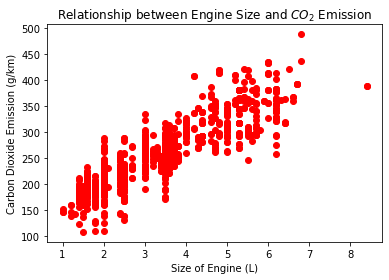

In [7]:
plt.scatter(ft.ENGINESIZE, ft.CO2EMISSIONS,  color='red')
plt.title("Relationship between Engine Size and $CO_2$ Emission")
plt.xlabel("Size of Engine (L)")
plt.ylabel("Carbon Dioxide Emission (g/km)")
plt.show()

Now, let's see the change with respect to other variables also.

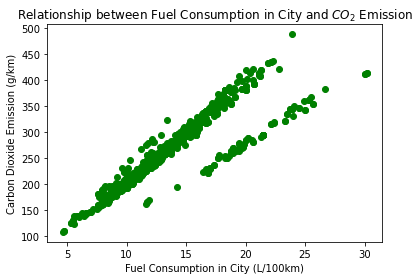

In [8]:
plt.scatter(ft.FUELCONSUMPTION_CITY, ft.CO2EMISSIONS,  color='green')
plt.title("Relationship between Fuel Consumption in City and $CO_2$ Emission")
plt.xlabel("Fuel Consumption in City (L/100km)")
plt.ylabel("Carbon Dioxide Emission (g/km)")
plt.show()

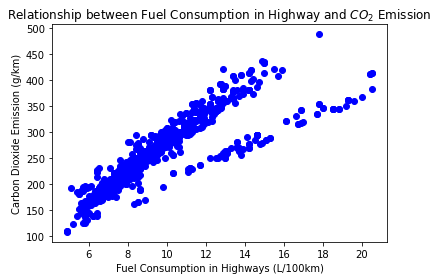

In [9]:
plt.scatter(ft.FUELCONSUMPTION_HWY, ft.CO2EMISSIONS,  color='blue')
plt.title("Relationship between Fuel Consumption in Highway and $CO_2$ Emission")
plt.xlabel("Fuel Consumption in Highways (L/100km)")
plt.ylabel("Carbon Dioxide Emission (g/km)")
plt.show()

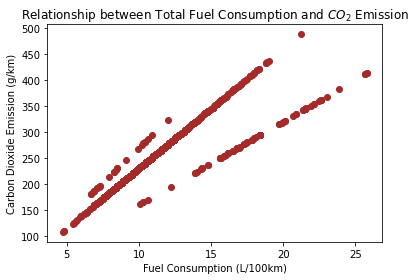

In [10]:
plt.scatter(ft.FUELCONSUMPTION_COMB, ft.CO2EMISSIONS,  color='brown')
plt.title("Relationship between Total Fuel Consumption and $CO_2$ Emission")
plt.xlabel("Fuel Consumption (L/100km)")
plt.ylabel("Carbon Dioxide Emission (g/km)")
plt.show()

It's evident that there is a linear relationship between each x variables and y

## Train and Test Data Creation
Now, to build our Regression model we need to split the data into Train and Test datasets. We can use train_test_split functionaluty from sklearn library to split the whole dataset into two, wherein the Train data will be used to build the model and test data to evaluate the performance of the model.

In [11]:
x = ft[["ENGINESIZE", "FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB"]]
y = ft.CO2EMISSIONS #dependent variable
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state =100)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(853, 4) (853,)
(214, 4) (214,)


- **test_size** specifies what proportion of dataset need to be converted to test data. So 0.2 test_size means 20% of dataset is categorized as test data and rest 80% as train data. Since we have 1067 data points 214 of them have been split into test dataset and rest 853 into train dataset.
- **random_state** is used to get consistent results.

## Building the Regression Model
Now let's fit the model using linear regression, which is a supervised machine learning algorithm that predicts the value of dependent variable by assuming a linear relationship exists with each of the independent variables.

In [12]:
from sklearn import linear_model
#Fitting the model
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)

As this is an example of multiple linear regression, we will have co-efficients associated with each of the independent variables and a y intercept as parameters of our fit line. Ordinary Least Squares is used to find the parameters and coef_ and intercept_ attributes of linear regression will give the value of co-efficients and y-intercept respectively.

In [13]:
print ('Coefficients: ', lr.coef_)
print ('Intercept: ',lr.intercept_)

Coefficients:  [ 18.80428269 -10.76928971 -12.79167028  32.73386181]
Intercept:  78.45122410406432


## Predictions and Accuracy
Now let's predict the value of $CO_2$ emissions (our dependent variable) the predict method of linear regression from sklearn. It will predict the values of y based on the x values in our test dataset

In [14]:
y_hat= lr.predict(x_test)

In [15]:
y_hat[:5]

array([259.17528895, 307.60000432, 247.83893086, 322.96711664,
       346.06915488])

Now we can see the first five predictions our model has made. But we need to check how accurate are these predictions using $R^2$ (co-efficient of determination) value of the model. For this we can use the score method of linear regression from sk learn.

In [16]:
print("Accuracy of the Linear Regression Model:", lr.score(x_test, y_test))

Accuracy of the Linear Regression Model: 0.8607969982481182


So our model can explain 86.1% variation in Carbon Dioxide emissions and seems to be a good fit.

We can try using different models to explain the relationship and check the efficiency of each.

## Decision Tree Regressor
This supervised machine learning model makes predictions by learning decision rules from features of the dataset, wherein the algorithm breaks down data continuously. We can use DecisionTreeRegressor function from sklearn to create a decision tree regression model for our dataset.


In [17]:
from sklearn.tree import DecisionTreeRegressor
#fit the model
dtree = DecisionTreeRegressor(max_depth= 1, min_samples_leaf=0.3, random_state=1)
dtree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=1, min_samples_leaf=0.3, random_state=1)

- **max_depth** is the maximum depth of the tree. The default value is None, which means nodes are expanded until all leaves are pure or until all leaves contain less samples than min_samples_split. The deeper we allow the tree to grow, our models becomes more complex by overfitting the train data. Thus it becomes useless for generalized purposes.

- **min_samples_leaf** is the minimum number of samples required to be at a leaf node. Default value is 1, or if we need a float a value between (0,0.5] must be specified. This means that in tree it is not necessary that each leaf should have an impurity of 0. A very small number will overfit the data and very large number means model will not learn enough from data.

- **random_state** is the seed used by random number generator. It's used to get consistent results

In [18]:
from sklearn.metrics import r2_score
y_hat_tree= dtree.predict(x_test) #Make predictions using decision tree model
y_hat_tree[:5]

array([314.40934066, 314.40934066, 211.8404908 , 314.40934066,
       314.40934066])

Now, let's check the performance of our model by finding the $R^2$ value using r2_score command from sklearn.

In [19]:
print("Accuracy of Decision Tree:", r2_score(y_test, y_hat_tree)) 

Accuracy of Decision Tree: 0.6247866728728506


So the accuracy of the model is only 62.5%. But we can increase this accuracy by hypertuning parameters. For example the value for min_samples_leaf is quite larging preventing the model from learning enough. So let's tune it down.

In [20]:
dtree1 = DecisionTreeRegressor(max_depth= None, min_samples_leaf=0.2, random_state=1)
dtree1.fit(x_train, y_train)  
y1 = dtree1.predict(x_test)
print("Accuracy of Decision Tree:", r2_score(y_test, y1))

Accuracy of Decision Tree: 0.7981244602745003


The accuracy has increased to 79.8%, and we have a better model. Still, the model is not efficient enough. This might be due to the overfittiong of training data, resulting a poor performance in test data. This is one of the disadvantages of decision trees.

## Random Forest Regressor
With decision trees there is always a chance to overfit the data. Random Forest algorithms could be untilized to overcome this issue. We can use RandomForestRegressor from sklearn, so that, instead of trying to split data on all features, a sample of features could be selected for each split, thus reducing the variance of the model.

In [21]:
from sklearn.ensemble import RandomForestRegressor
#Fitting the model
rf = RandomForestRegressor(n_estimators=10, min_samples_leaf=20, random_state=1)
rf.fit(x_train, y_train)

RandomForestRegressor(min_samples_leaf=20, n_estimators=10, random_state=1)

**n_estimators** is the number of trees in the forest. Default value is 10. One can choose as high value as the processor can handle to make the predictions stronger and stable


In [22]:
y_hat_rf = rf.predict(x_test) # Predicting values based on Random Forest model
y_hat_rf[:5]

array([275.90397633, 295.84719435, 257.06128951, 314.06421041,
       352.47370387])

Let's check how well the model can make prediction by finding the $R^2$ value. Again we can use r2_score command from sklearn.

In [23]:
print("Accuracy of Random Forest:",r2_score(y_test, y_hat_rf))

Accuracy of Random Forest: 0.9184496306992831


The model seems to fit the data pretty well as it can explain 91.8% of variation in Carbon Dioxide emissions. But, let's increase the n_estimator value to see its effect

In [24]:
rf1 = RandomForestRegressor(n_estimators=500, min_samples_leaf=20, random_state=1)
rf1.fit(x_train, y_train)
y_hat_rf1 = rf1.predict(x_test)
print("Predictions:",y_hat_rf1[:5])
print("Accuracy of Random Forest:", r2_score(y_test, y_hat_rf1))

Predictions: [273.0587076  293.55404819 258.39024669 312.96385071 348.55643508]
Accuracy of Random Forest: 0.922026179653815


Now the model have stronger predictions and better accuracy of 92.2%.

Out of all the models used Random Forest Regression was the best model and it reduces overfitting the train data.